# Using Pandas to Look at Real World Data

In [2]:
%matplotlib inline
import pandas as pd
import pandas.io.data as web
import datetime
import numpy as np

/home/matthewmckay/anaconda/lib/python3.5/site-packages/pandas/io/data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [3]:
#setup up some date objects
start = datetime.datetime(1950, 1, 1)
end = datetime.datetime(2016, 2, 24)

## Series Values for "Fred"

| code | description |
|------|-------------|
|GPDIC1|Real Gross Private Domestic Investment |
|GDPC1 |Real Gross Domestic Product |

### Additional Information

| code | description |
|------|-------------|
|GPDIC1|https://research.stlouisfed.org/fred2/series/GPDIC1|
|GDPC1 |https://research.stlouisfed.org/fred2/series/GDPC1|

## Real GDP (GDPC1)

| Data Type         | Description                           |
|-------------------|--------------------------------------|
|Title:              |Real Gross Private Domestic Investment|
|Series ID:          |GPDIC1                                |
|Source:             |US. Bureau of Economic Analysis       |
|Release:            |Gross Domestic Product                |
|Seasonal Adjustment:|Seasonally Adjusted Annual Rate       |
|Frequency:          |Quarterly                             |
|Units:              |Billions of Chained 2009 Dollars      |
|Date Range:         |1947-01-01 to 2015-10-01              |
|Last Updated:       |2016-01-29 7:41 AM CST                |
|Notes:              |BEA Account Code: A006RX1             |

In [4]:
#Use Pandas Web Reader to Fetch data from Fred#
real_gdp = web.DataReader("GDPC1", "fred", start, end)

In [5]:
#Preview the Data#
real_gdp.head()

,GDPC1
DATE,
1950-01-01,2084.6
1950-04-01,2147.6
1950-07-01,2230.4
1950-10-01,2273.4
1951-01-01,2304.5


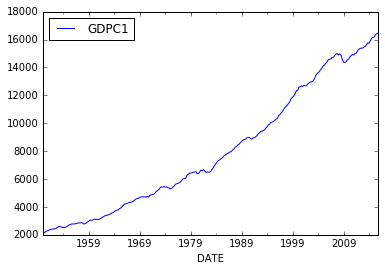

In [6]:
#Plot the Data#
real_gdp.plot()

In [7]:
# Transform the data using a log transform
real_gdp['log_GDPC1'] = np.log(real_gdp['GDPC1'])

In [8]:
real_gdp.head()

,GDPC1,log_GDPC1
DATE,,
1950-01-01,2084.6,7.642332
1950-04-01,2147.6,7.672106
1950-07-01,2230.4,7.709936
1950-10-01,2273.4,7.729032
1951-01-01,2304.5,7.742619


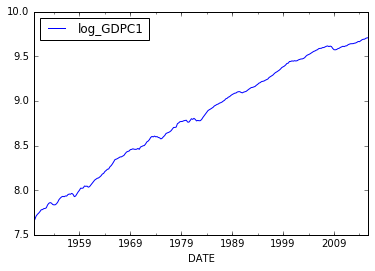

In [9]:
#Plot only the data in logs
real_gdp[['log_GDPC1']].plot()

In [10]:
#Use Scipy to detrend the data
import scipy.signal as ss
data = ss.detrend(real_gdp['log_GDPC1'], type='linear')
dtlrgdp = pd.DataFrame(data, columns=["DT-log_GDPC1"], index=real_gdp.index)

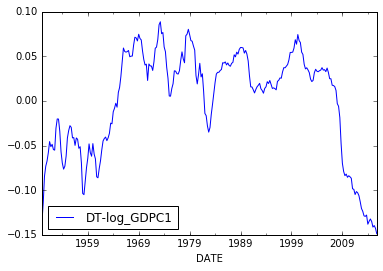

In [11]:
#The Detrended Series#
dtlrgdp.plot()

### Looking at a subset of the data (1970 to 2000)

In [19]:
s = datetime.datetime(1970, 1, 1)
e = datetime.datetime(2000, 2, 24)

In [20]:
data = real_gdp.ix[s:e]['log_GDPC1']
dtdata = ss.detrend(data, type='linear')
dtlrgdp = pd.DataFrame(dtdata, columns=["DT-log_GDPC1"], index=data.index)

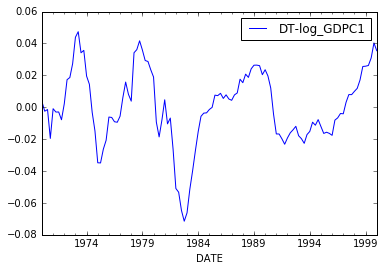

In [21]:
dtlrgdp.plot()

## Real Investment (GPDIC1)

In [69]:
real_gpdi = web.DataReader("GPDIC1", "fred", start, end)

In [70]:
real_gpdi.tail()

,GPDIC1
DATE,
2014-10-01,2772.5
2015-01-01,2830.2
2015-04-01,2864.8
2015-07-01,2859.7
2015-10-01,2842.0


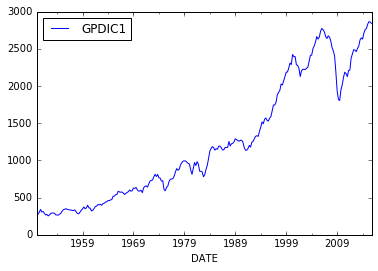

In [71]:
real_gpdi.plot()

In [86]:
# Transform the data using a log transform
real_gpdi['log_GPDIC1'] = np.log(real_gpdi['GPDIC1'])

In [87]:
real_gpdi.tail()

,GPDIC1,log_GPDIC1
DATE,,
2014-10-01,2772.5,7.927505
2015-01-01,2830.2,7.948103
2015-04-01,2864.8,7.960254
2015-07-01,2859.7,7.958472
2015-10-01,2842.0,7.952263


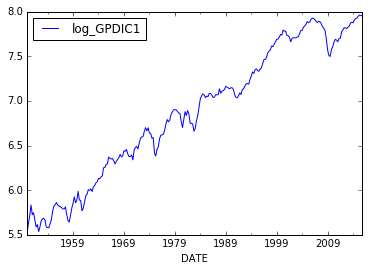

In [89]:
real_gpdi[['log_GPDIC1']].plot()

In [90]:
import scipy.signal as ss
data = ss.detrend(real_gpdi['log_GPDIC1'], type='linear')
dtlrgdpi = pd.DataFrame(data, columns=["DT-log_GPDIC1"], index=real_gpdi.index)

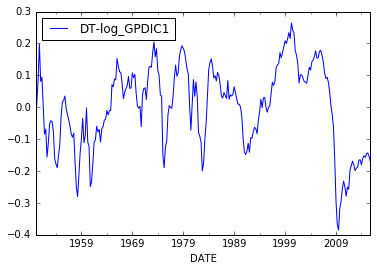

In [92]:
dtlrgdpi.plot()

## Plot both GDP and Investment Together

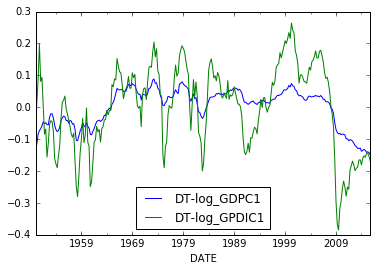

In [102]:
#Look at Both Time Series Together#
both = dtlrgdp.merge(dtlrgdpi, left_index=True, right_index=True)
both.plot()